# Sales Prediction using Linear Regression


Get ready to dive into the exciting world of sales prediction!  In today's fast-paced and highly competitive business world, predicting sales has become an essential aspect for companies to thrive and succeed. In order to keep up with the ever-changing market trends, businesses need to have a sound understanding of their sales patterns and be able to forecast future trends with accuracy. In this Python project, we will be using linear regression to predict sales based on advertisement data. By analyzing the relationship between various advertisements and sales outcomes, we will develop a model that will allow us to accurately predict sales and make informed decisions to drive growth and success.

![alt](https://images.unsplash.com/photo-1599803654935-5b9d1c93578c?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=2070&q=80)

In [1]:
# Library 
import pandas as pd
import seaborn as sns
import matplotlib as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error, r2_score, confusion_matrix
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display, HTML

#   Marketing and Sales Data

In [2]:
# Import Data
ad_data = pd.read_csv('datasets/Dummy Data HSS.csv')
ad_data.head(5)

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In this project we use fictitious data found on [Kaggle](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data). What our data looks like: 

<ul>
    <li> <code> TV </code> - TV promotion budget (in million)
    <li> <code> Radio </code> - Radio promotion budget (in million)
    <li> <code> Social Media </code> - Social Media promotion budget (in million)
    <li> <code> Influencer </code> - Whether the promotion collaborate with Mega, Macro, Nano, Micro influencer
    <li> <code> Sales </code> - Sales (in million)
</ul>

# Data cleaning

In [3]:
#rearrange header
ad_data.columns = ad_data.columns.str.lower()
ad_data.columns = ad_data.columns.str.replace(' ','_')

In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tv            4562 non-null   float64
 1   radio         4568 non-null   float64
 2   social_media  4566 non-null   float64
 3   influencer    4572 non-null   object 
 4   sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [5]:
ad_data.describe()

,tv,radio,social_media,sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


In [6]:
ad_data.isnull().sum()

tv              10
radio            4
social_media     6
influencer       0
sales            6
dtype: int64

In [7]:
ad_data = ad_data.dropna()
ad_data.isnull().sum()

tv              0
radio           0
social_media    0
influencer      0
sales           0
dtype: int64

# EDA

## Sales and Budget

<AxesSubplot:ylabel='Total Budget (in Million)'>

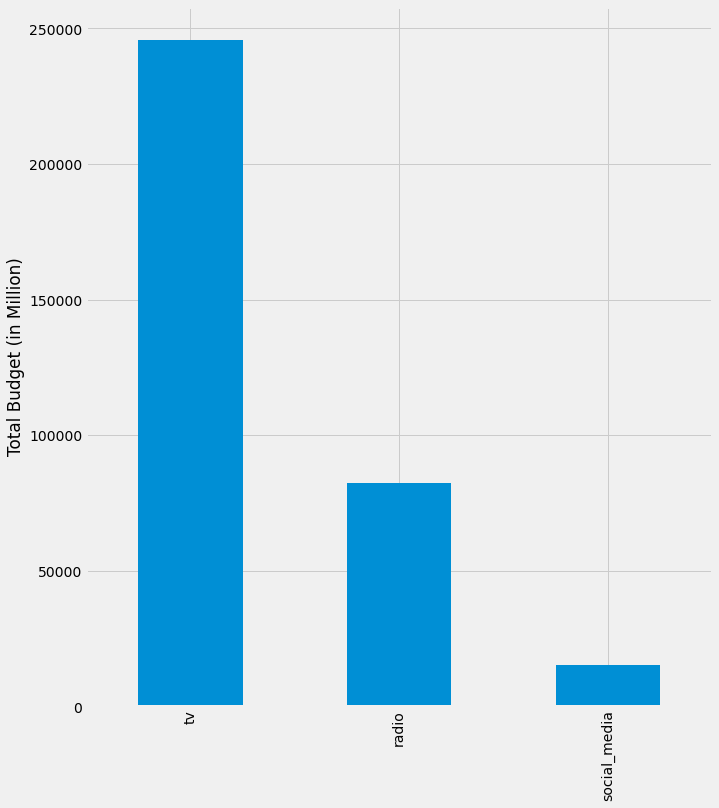

In [23]:
sales_df= ad_data.melt(
    id_vars=['sales'], 
    value_vars=['tv', 'radio', 'social_media'], 
    value_name='budget',
    var_name='ad_type'
)

sales_df = sales_df.groupby('ad_type')['budget'].sum().sort_values(ascending=False)

plt.rcParams['figure.figsize'] = [10,12]
plt.style.use('fivethirtyeight')
sales_df.plot(kind='bar', xlabel='', ylabel='Total Budget (in Million)')


This plot helped us uncovered a dynamic trend. The companies are investing heavily in TV advertising, with it being their top choice for allocating their budget. Radio advertising comes in as a close second, followed by a more modest investment in social media.

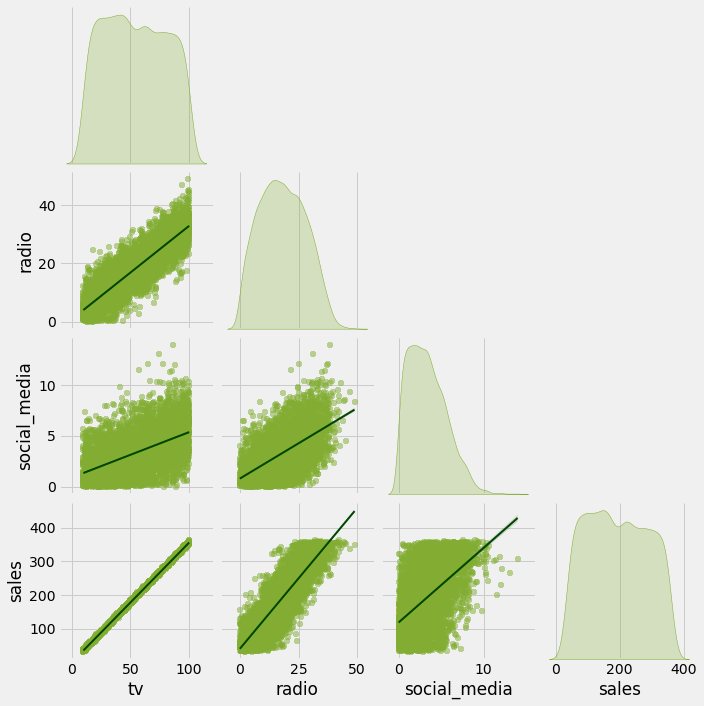

In [9]:
sns.pairplot(ad_data, 
            kind='reg',
            markers="+",
            diag_kind="kde",
            corner=True, 
            diag_kws= {'color': '#82ad32'},
            plot_kws={'line_kws':{'color':'#004600', 'lw': 2}, 
                           'scatter_kws': {'alpha': 0.5, 
                                           'color': '#82ad32'}})

<AxesSubplot:>

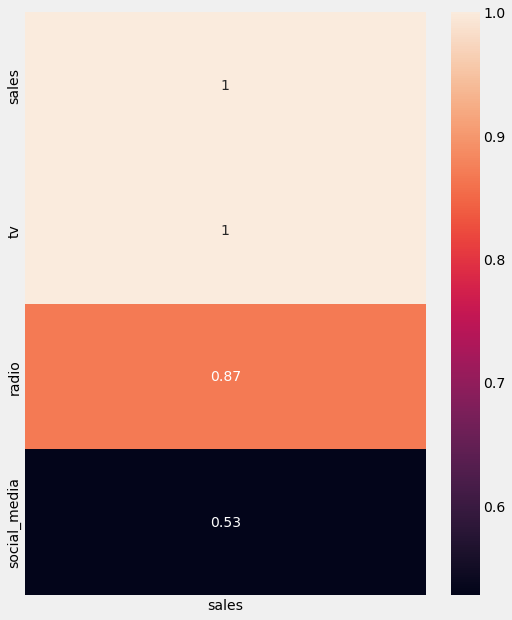

In [10]:
plt.rcParams['figure.figsize'] = [8,10]
sns.heatmap(ad_data.corr()[['sales']]\
    .sort_values(by='sales', ascending= False),annot=True)

Our observation has uncovered two thrilling trends. The companies are investing in social media, but they're doing so with a more strategic approach by allocating only a small portion of their budget towards it. And the real game changer? A strong correlation has been found between sales and both TV and radio advertising. While the relationship with social media is still unfolding, this is a fantastic opportunity to dive deeper and unlock its full potential!

## The Influencer

Influencer marketing has become an increasingly popular strategy for businesses to reach their target audience. In this space, influencers can be categorized based on their reach and engagement levels. Here's a breakdown of the different categories of influencers:

- **Nano influencer**: Nano influencers are individuals with a small following, typically less than 1000 followers. They often have a strong connection with their followers and high engagement rates.
- **Micro influencer**: Micro influencers have a slightly larger following, usually between 1000-10,000 followers. They tend to be experts in their niche and are highly regarded by their followers.
- **Macro influencer**: Macro influencers have a following of 10,000-100,000 followers and have significant reach in their niche. They have a strong online presence and a high level of engagement.
- **Mega influencer**: Mega influencers are individuals with a following of over 100,000 followers and have the largest reach of all influencer categories. They are typically celebrities or public figures and have a wide reach beyond their niche.
In summary, the difference between nano, micro, macro, and mega influencers is their reach and engagement levels. Nano influencers have a small but highly engaged following, while mega influencers have a massive reach but lower engagement rates.

How companies are investing in this new advertising opportunity ? 

<AxesSubplot:title={'center':'Social Media Allocation per Influencer'}, ylabel='Budget (in Million)'>

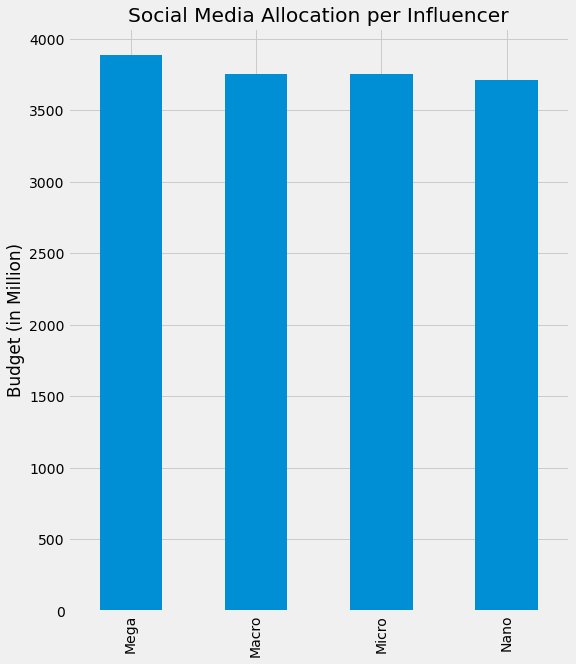

In [11]:
plt.style.use('fivethirtyeight')
influencer_df = ad_data.groupby('influencer')['social_media'].sum().sort_values(ascending=False)
influencer_df.plot(kind='bar', xlabel='', ylabel='Budget (in Million)', title='Social Media Allocation per Influencer')

Companies may favor mega influencers, but they are also putting resources towards other types of influencers, making the allocation between them quite similar. This is a unique opportunity to uncover the impact of different influencer types on sales and determine which ones bring the best return on investment.

# Modelling

In [12]:
ad_data = pd.get_dummies(ad_data, drop_first = True)
ad_data = ad_data[['tv', 'radio', 'social_media', 
       'influencer_Mega', 'influencer_Micro', 'influencer_Nano', 'sales']]
ad_data


,tv,radio,social_media,influencer_Mega,influencer_Micro,influencer_Nano,sales
0,16.0,6.566231,2.907983,1,0,0,54.732757
1,13.0,9.237765,2.409567,1,0,0,46.677897
2,41.0,15.886446,2.913410,1,0,0,150.177829
3,83.0,30.020028,6.922304,1,0,0,298.246340
4,15.0,8.437408,1.405998,0,1,0,56.594181
...,...,...,...,...,...,...,...
4567,26.0,4.472360,0.717090,0,1,0,94.685866
4568,71.0,20.610685,6.545573,0,0,1,249.101915
4569,44.0,19.800072,5.096192,0,1,0,163.631457
4570,71.0,17.534640,1.940873,0,0,0,253.610411


In [24]:
x = ad_data.iloc[:,0:-1]
y = ad_data.iloc[:,-1:]
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 1)

For this model we will take in consideration all variable at first. 

## With Scikit-Learn

In [25]:
#fit the data
LR = LinearRegression()
LR.fit(X_train,y_train)
print(LR.intercept_, LR.coef_, LR.score(X_train, y_train))

[-0.13522546] [[ 3.56581657 -0.01376975  0.01177413  0.05319451  0.03327864 -0.15011308]] 0.999002907890483


Using this output, we can write the equation for the fitted regression model:

$$y = -0.13 + 3.56x_{1} – 0.013x_{2} + 0.011x_{3} + 0.053x_{4} + 0.033x_{5} - 0.15x_{6}$$

Important highlights: 
- For every 1 increase in TV budget, the sales will increase by 3.5
- By engaging an influencer the sales will decrease by 0.15 units
- If we do not spend any promotional budget, our sales is predicted to decrease by - 0.13 units

The R2 value of the model is a staggering 0.99, meaning that 99% of the variation in the response variable can be attributed to the two predictor variables in the model. This is a clear indication that our model is performing exceptionally well and is a reliable tool for sales prediction.

## With StatsModels

In [28]:
X_train = sm.add_constant(X_train)
LR2= sm.OLS(y_train, X_train).fit()
print(LR2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.681e+05
Date:                Sat, 11 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:13:10   Log-Likelihood:                -8510.3
No. Observations:                3409   AIC:                         1.703e+04
Df Residuals:                    3402   BIC:                         1.708e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1352      0.149  

In [29]:
print(LR2.pvalues)

const               0.365409
tv                  0.000000
radio               0.221381
social_media        0.679011
influencer_Mega     0.708539
influencer_Micro    0.816031
influencer_Nano     0.296972
dtype: float64


In [30]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
vif_data

,feature,VIF
0,const,8.782845
1,tv,4.091850
2,radio,4.667926
3,social_media,1.582523
4,influencer_Mega,1.521109
5,influencer_Micro,1.520396
6,influencer_Nano,1.516521


Without surprise we fall back on the former results : same R-squared and same regression coefficient.
- The only variable with a significant effect on sales here is <code>tv</code>. Indeed its p-value is below the 0.01 significance level.
- <code>social_media</code> is not at all significant, there is 85% of chance that this variable has no effect. 
- The F statistic has a very low p-value. We can say that the model fit is statistically significant
- The model is quite stable, indeed by studying collinearities the variance inflation factor of all variables remains below 10. 

Let's try another model, without the mega and nano influencer, as it has no significant effect on our explanatory variable. 

In [36]:
x2 = ad_data[["tv", "radio", "social_media", "influencer_Nano"]]
LR3= sm.OLS(y, x2).fit()
print(LR3.summary())

                                 OLS Regression Results                                
Dep. Variable:                  sales   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.963e+06
Date:                Sat, 11 Feb 2023   Prob (F-statistic):                        0.00
Time:                        12:16:03   Log-Likelihood:                         -11367.
No. Observations:                4546   AIC:                                  2.274e+04
Df Residuals:                    4542   BIC:                                  2.277e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [37]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x2.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x2.values, i)
                          for i in range(len(x2.columns))]
vif_data

,feature,VIF
0,tv,18.774843
1,radio,21.143145
2,social_media,4.968136
3,influencer_Nano,1.253393


Our model has achieved performance results on par with a previous model. However, after careful consideration, we have decided to stick with the first model due to its stability. The latter model faced a significant challenge with collinearity between variables, making it less reliable for predictions. Our first model stands strong and is the best choice for accurate sales predictions.

# Evaluation Matrics

In [20]:
y_pred = LR.predict(X_test) 

r2_score = r2_score(y_test, y_pred)*100
mae = mean_absolute_error(y_test, y_pred)
mse = mse(y_test, y_pred)

print("R-Squared value : {0:.2f}%".format(r2_score))
print("Mean Absolute Error: {0:.2f}%".format(mae))
print("Mean Squared Error: {0:.2f}%".format(mae))

R-Squared value : 99.89%
Mean Absolute Error: 2.47%
Mean Squared Error: 2.47%


# Deployement 

Get ready to revolutionize the way marketing managers make decisions! We're taking action and creating a cutting-edge mini-application that will revolutionize the sales prediction process. With just a few simple entries, the marketing managers will have a powerful tool at their fingertips, providing accurate sales predictions based on the model we've meticulously selected and optimized. 

In [21]:
#Building the widgets

#description widget
desc = widgets.HTML(
    value="<p style='color: grey' > Adjust the sliders to discover the effectiveness of your campaign.\
         <br> (Numbers are express in Millions Dollars.)</p>",
    placeholder='',
    description='',
)
desc.style.description_width = '0'

#Influencer widget
w = widgets.ToggleButtons(
    options=['Mega', 'Micro', 'Nano'],
    description='Influencer:',
    disabled=False,
    button_style='info',
    tooltips=['Mega', 'Micro', 'Nano'],
    value = 'Micro'
)


In [22]:
#Interactive display
@interact
def prediction( text = desc,
            influencer = w, 
            Tv=(0,1000, 10), 
            Radio=(0, 1000, 10), 
            Social_media=(0, 1000, 10)
            ):
            
                nano_influencer, micro_influencer, mega_influencer = 0, 0, 0 

                if influencer == 'Mega': 
                        mega_influencer = 1
                elif influencer == 'Micro': 
                        micro_influencer = 1
                else:
                        nano_influencer = 1

                params= pd.DataFrame({"tv":[Tv], "radio":[Radio], "social_media":[Social_media], 
                "influencer_Mega":[mega_influencer] , "influencer_Micro":[micro_influencer], "influencer_Nano":[nano_influencer]} )
                sales_predict = round(LR.predict(params)[0][0], 2)
                message = "${0:.2f}M".format(sales_predict)
                return display(HTML('<br> <span style="color: grey" > With this campaign, you have the potential to reach a turnover of: </span> <strong>' + message + '</strong><br>'))


interactive(children=(HTML(value="<p style='color: grey' > Adjust the sliders to discover the effectiveness of…